# Week9 - Ensemble Assignment

* Train-test split
* Train a random forest model
* Try bagging & boosting algorithms
* Evaluate the models
* Explain findings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_moons, make_circles

In [2]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

def generate_dataset():
    X, y = make_circles(n_samples=1000,noise=0.1, random_state=42)
    df1 = pd.DataFrame(X)
    df1['y'] = y

    X1, y1 = make_moons(n_samples=1000, noise=0.1, random_state=42)
    df2 = pd.DataFrame(X1)
    df2['y'] = y

    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

In [3]:
X, y = generate_dataset()

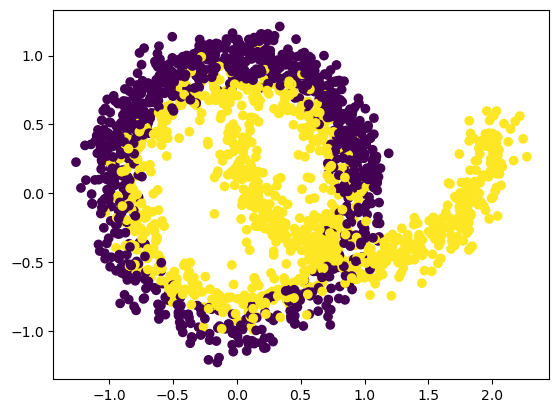

In [4]:
plt.scatter(X[:,0], X[:,1],c=y)

In [5]:
y.value_counts()

y
0    1000
1    1000
Name: count, dtype: int64

## Train-Test Split for the models

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Pipelines for Random Forest, Bagging and adaboost pipeline

In [7]:
# Define preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), list(range(X.shape[1])))
    ])

In [8]:
# Define classifiers within pipelines
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [9]:
bagging_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(RandomForestClassifier(), n_estimators=100, random_state=42))
])


In [10]:
adaboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(n_estimators=100, random_state=42, algorithm='SAMME'))
])

Accuracy with Classification Report

In [11]:
# Train and evaluate models
for name, pipeline in [('Random Forest', rf_pipeline), ('Bagging', bagging_pipeline), ('AdaBoost', adaboost_pipeline)]:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"{name} Accuracy:", accuracy)
    print(f"{name} Classification Report:\n{report}\n")

Random Forest Accuracy: 0.8925
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       194
           1       0.91      0.87      0.89       206

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400


Bagging Accuracy: 0.89
Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       194
           1       0.91      0.87      0.89       206

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400


AdaBoost Accuracy: 0.88
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       194
           1       0.90      0.86      0.88       206

  

# Explain Findings

Overall, all three models (Random Forest, Bagging, and AdaBoost) perform well in classifying the dataset, with Random Forest and Bagging achieving slightly higher accuracies compared to AdaBoost. The classification reports indicate balanced performance in terms of precision, recall, and F1-score for each class but when compared with thte terms i can support Bagging, Random Forest.